In [1]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('elapsed-time-control-group.csv')
df

,vms,elapsed
0,10,19.6
1,20,40.1
2,20,40.9
3,30,63.1
4,30,60.3
5,40,97.3
6,40,100.0
7,50,105.3


In [3]:
df.corr()

,vms,elapsed
vms,1.000000,0.980505
elapsed,0.980505,1.000000


In [4]:
df = df.dropna() # drop all rows that have NAN/none

In [5]:
x = torch.FloatTensor(df[['vms']].values) # 특성 데이터
y = torch.FloatTensor(df[['elapsed']].values) # 라벨

In [6]:
model = Sequential()
model.add_module('nn1', Linear(1,1))
list(model.parameters())

[Parameter containing:
 tensor([[-0.0734]], requires_grad=True),
 Parameter containing:
 tensor([0.7670], requires_grad=True)]

In [7]:
loss_fn = MSELoss()
optimizer = Adam(model.parameters(), lr=0.1)

In [8]:
hist = []
for step in range(1000):
    optimizer.zero_grad()
    hx = model.forward(x) # w*x+b # hx = model(x)
    cost = loss_fn(hx, y)
    cost.backward()
    optimizer.step()
    print(step, cost.item())
    hist.append(cost.item())

0 5474.39453125
1 4994.36279296875
2 4537.2099609375
3 4103.296875
4 3692.923828125
5 3306.3173828125
6 2943.62744140625
7 2604.91748046875
8 2290.159423828125
9 1999.2255859375
10 1731.88427734375
11 1487.792724609375
12 1266.4951171875
13 1067.4180908203125
14 889.870361328125
15 733.0438232421875
16 596.0158081054688
17 477.7554931640625
18 377.130615234375
19 292.9189147949219
20 223.82159423828125
21 168.47903442382812
22 125.48877716064453
23 93.42577362060547
24 70.86357879638672
25 56.3961181640625
26 48.65962219238281
27 46.35316467285156
28 48.257755279541016
29 53.2529296875
30 60.33000946044922
31 68.60218048095703
32 77.31049346923828
33 85.82645416259766
34 93.65019989013672
35 100.40594482421875
36 105.83404541015625
37 109.7804946899414
38 112.18505096435547
39 113.06755828857422
40 112.5135269165039
41 110.66029357910156
42 107.68292999267578
43 103.78092956542969
44 99.16650390625
45 94.05380249023438
46 88.64971923828125
47 83.14666748046875
48 77.71678161621094
49 7

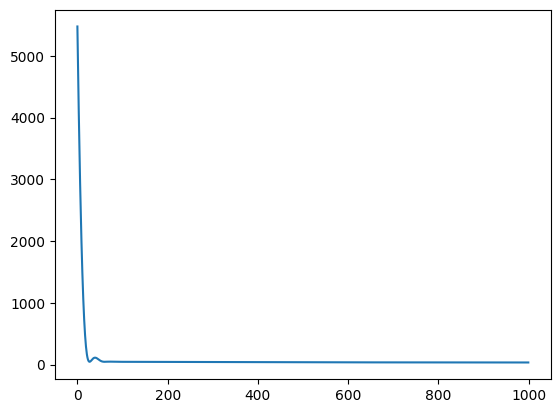

In [9]:
plt.plot(hist)
plt.show()

In [10]:
model[0].weight

Parameter containing:
tensor([[2.3538]], requires_grad=True)

In [11]:
model[0].bias

Parameter containing:
tensor([-4.5774], requires_grad=True)

In [12]:
# model( torch.FloatTensor([[15]]))
pred = model(x).detach().numpy()

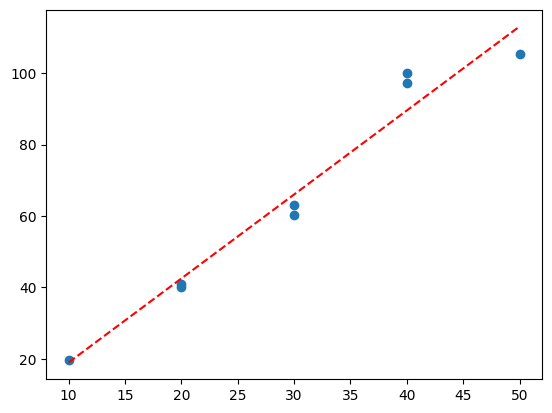

In [13]:
plt.scatter(x, y)
plt.plot(x, pred, 'r--') # r-- : Red, dashed line
plt.show()